# **Penguin Classification**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("penguins.csv")

In [3]:
df.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## EDA & Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df["sex"].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [8]:
for col in df:
    print(df[col].unique())

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
[39.1 39.5 40.3 36.7 39.3 38.9 39.2 41.1 38.6 34.6 36.6 38.7 42.5 34.4
 46.  37.8 37.7 35.9 38.2 38.8 35.3 40.6 40.5 37.9 37.2 40.9 36.4 42.2
 37.6 39.8 36.5 40.8 36.  44.1 37.  39.6 42.3 40.1 35.  42.  34.5 41.4
 39.  35.7 41.3 41.6 35.5 41.8 33.5 39.7 45.8 42.8 36.2 42.1 42.9 35.1
 37.3 36.3 36.9 38.3 34.  38.1 33.1 43.2 41.  45.6 42.7 40.2 35.2 41.5
 38.5 43.1 36.8 37.5 35.6 32.1 40.7 46.5 50.  51.3 45.4 52.7 45.2 46.1
 46.6 51.7 47.  52.  45.9 50.5 50.3 58.  46.4 49.2 42.4 48.5 50.6 46.7
 49.5 52.8 54.2 51.  49.7 47.5 47.6 46.9 53.5 49.  46.2 50.9 45.5 50.8
 50.1 51.5 49.8 48.1 51.4 45.7 50.7 52.2 49.3 50.2 51.9 46.8 55.8 43.5
 49.6 48.7 43.3 48.4 45.1 46.3 47.8 48.2 47.3 59.6 49.1 42.6 44.4 44.
 45.3 43.6 44.9 45.  43.8 50.4 54.3 47.7 48.6 51.1 52.5 47.4 43.4 52.1
 44.5 49.4 55.9 47.2 41.7 53.4 55.1 48.8 49.9]
[18.7 17.4 18.  19.3 20.6 17.8 19.6 17.6 21.2 21.1 19.  20.7 18.4 21.5
 18.3 19.2 18.1 17.2 18.9 18.6 17.9 16.

In [9]:
pd.concat({"Unique values" : df.apply(pd.unique), "Num" : df.nunique()}, axis=1)

,Unique values,Num
species,"[Adelie, Chinstrap, Gentoo]",3
island,"[Torgersen, Biscoe, Dream]",3
culmen_length_mm,"[39.1, 39.5, 40.3, 36.7, 39.3, 38.9, 39.2, 41....",163
culmen_depth_mm,"[18.7, 17.4, 18.0, 19.3, 20.6, 17.8, 19.6, 17....",79
flipper_length_mm,"[181.0, 186.0, 195.0, 193.0, 190.0, 182.0, 191...",54
body_mass_g,"[3750.0, 3800.0, 3250.0, 3450.0, 3650.0, 3625....",93
sex,"[MALE, FEMALE, .]",3


In [10]:
df = df[df["sex"] != "."]

In [11]:
df["sex"].unique()

array(['MALE', 'FEMALE'], dtype=object)

[Text(0, 0, '146'), Text(0, 0, '68'), Text(0, 0, '119')]

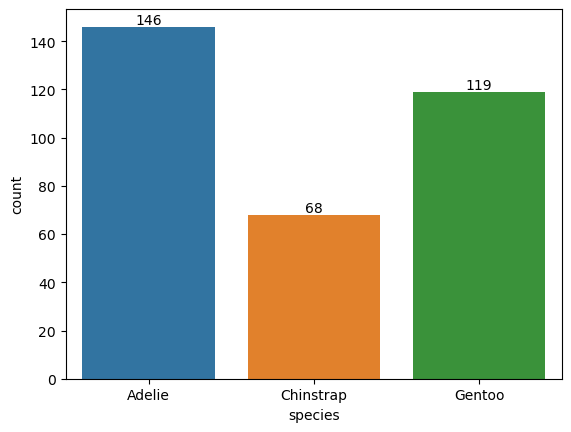

In [12]:
ax = sns.countplot(x="species", data=df)
ax.bar_label(ax.containers[0])

[Text(0, 0, '47'), Text(0, 0, '163'), Text(0, 0, '123')]

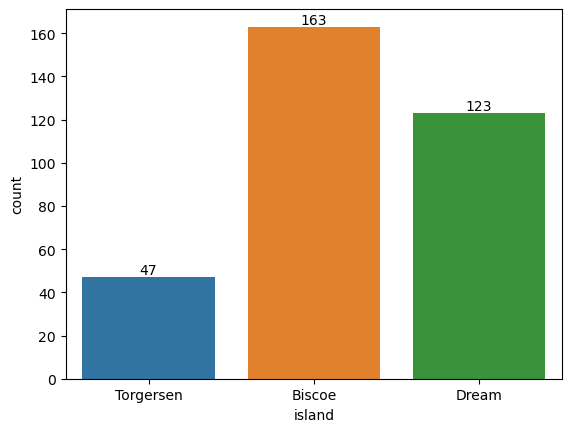

In [13]:
ax = sns.countplot(x="island", data=df)
ax.bar_label(ax.containers[0])

In [14]:
df.corr(numeric_only=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.228626,0.653096,0.589451
culmen_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


<Axes: >

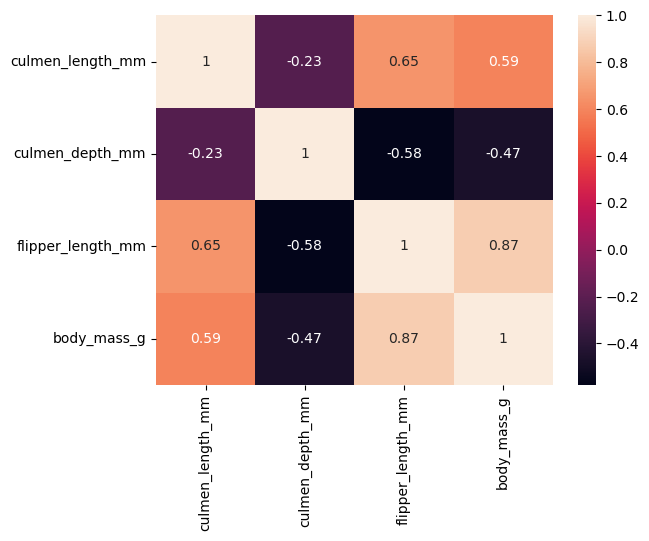

In [15]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

## Train Test Split

In [16]:
X = pd.get_dummies(df.drop("species", axis=1), drop_first=True)
y = df["species"]

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=9)

# Hyperparameters & Random Forest

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [21]:
n_est = [9,32,64,128]
max_feat = [1,2,3,4]
bootstrap_sec =[True, False]
oob = [True, False]

In [22]:
parameters= {
    "n_estimators" : n_est,
    "max_features" : max_feat,
    "bootstrap" : bootstrap_sec,
    "oob_score" : oob
}

In [23]:
random_forest = RandomForestClassifier(random_state=9)
grid = GridSearchCV(random_forest, parameters)

In [24]:
grid.fit(X_train,y_train)

c:\Users\mbatu\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\mbatu\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\mbatu\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\mbatu\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\mbatu\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probab

GridSearchCV(estimator=RandomForestClassifier(random_state=9),
             param_grid={'bootstrap': [True, False],
                         'max_features': [1, 2, 3, 4],
                         'n_estimators': [9, 32, 64, 128],
                         'oob_score': [True, False]})

In [25]:
grid.best_estimator_

RandomForestClassifier(bootstrap=False, max_features=1, n_estimators=64,
                       random_state=9)

In [26]:
pengu_pred = grid.predict(X_test)

## Model Değerlendirme

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

In [28]:
accuracy_score(pengu_pred, y_test)

0.98

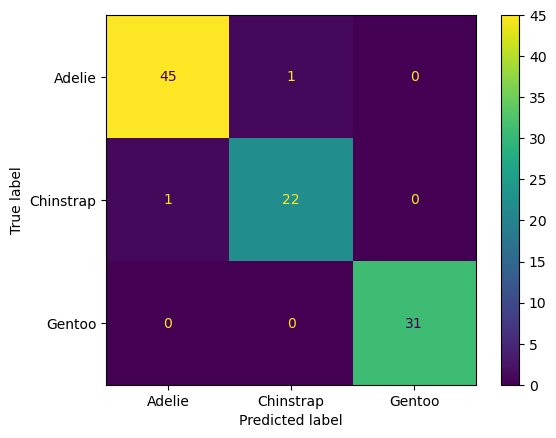

In [29]:
ConfusionMatrixDisplay.from_estimator(grid,X_test, y_test)

In [32]:
print(classification_report(y_test, pengu_pred))

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        46
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        31

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [30]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

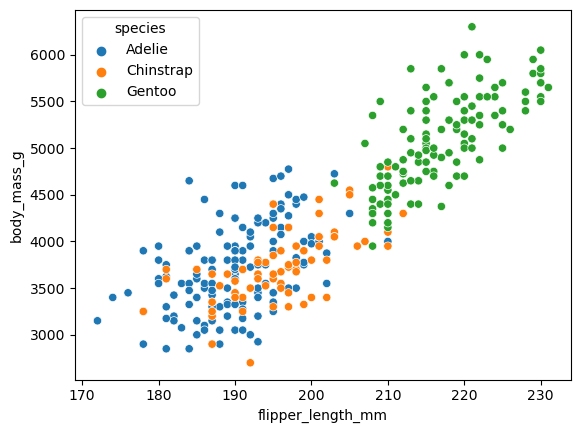

In [31]:
sns.scatterplot(x="flipper_length_mm", y="body_mass_g", hue="species", data=df)

## Elbow plot

In [34]:
error_rate = []
wrong_dec = []

for n in range(1,200):
    rand_forest_class = RandomForestClassifier(n_estimators=n,
                                                bootstrap=True, max_features=2)
    rand_forest_class.fit(X_train,y_train)
    pengu_preds = rand_forest_class.predict(X_test)
    error = 1 - accuracy_score(pengu_preds, y_test)

    sample = y_test.to_numpy()
    sample = sample.reshape(1,-1)[0]

    n_missed = np.sum(pengu_preds != sample)
    error_rate.append(error)
    wrong_dec.append(n_missed)

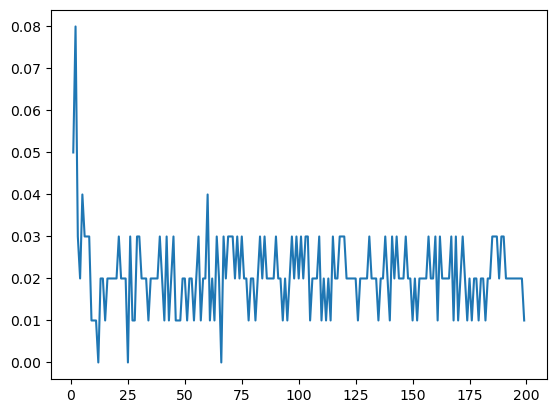

In [35]:
plt.plot(range(1,200), error_rate)

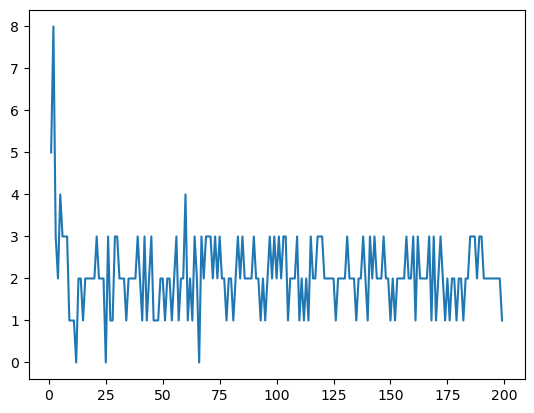

In [37]:
plt.plot(range(1,200), wrong_dec)

(10.0, 20.0)

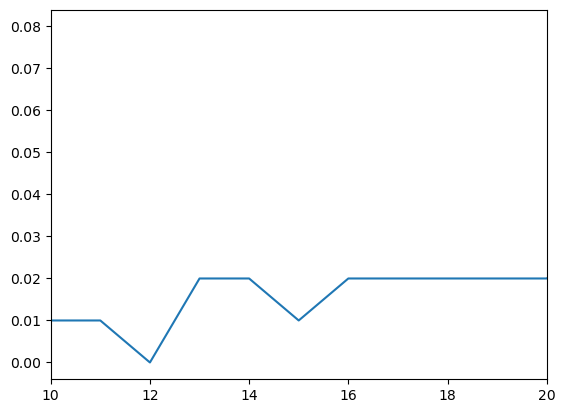

In [36]:
plt.plot(range(1,200), error_rate)
plt.xlim(10,20)